##    <span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#0b78c1">       SUPERVISED LEARNING PROJECT

# <span style="font-family: Arial; font-weight:bold;font-size:1.4em;color:#0e92ea"> Part <span style="font-family: Times New Roman; font-weight:bold;font-size:1.1em;color:#0e92ea"> I

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea"> PROJECT CONTEXT

<font color=#000>
    
Medical research university X is undergoing a deep research on patients with certain conditions.
University has an internal AI team. Due to confidentiality the patient’s details and the conditions are masked by
the client by providing different datasets to the AI team for developing a AIML model which can predict the
condition of the patient depending on the received test results.

&nbsp;

   <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea"> PROJECT OBJECTIVE
        
To demonstrate the ability to fetch, process and leverage data to generate useful predictions
by training Supervised Learning algorithms. To combine the given datasets into one, clean and process the data and train a KNN model.

&nbsp;

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea"> DATA DESCRIPTION
    
The data consists of biomechanics features of the patients according to their current conditions. Each patient is represented in the data set by six biomechanics attributes derived from the shape and
orientation of the condition to their body part.
    


# <span style="font-family: Arial; font-weight:bold;font-size:1.1em;color:#0e92ea"> STEP - 1

In [313]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
import warnings
warnings.filterwarnings("ignore")
from PIL import Image  
%matplotlib inline

## Import and warehouse data

In [314]:
df1 = pd.read_csv('Part1 - Normal.csv')
df1

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,Normal
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,Normal
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,Normal
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,Normal
...,...,...,...,...,...,...,...
95,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
96,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
97,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
98,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal


In [315]:
df1.shape

(100, 7)

In [316]:
df2 = pd.read_csv('Part1 - Type_H.csv')
df2

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Type_H
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Type_H
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Type_H
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Type_H
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Type_H
5,40.250200,13.921907,25.124950,26.328293,130.327871,2.230652,Type_H
6,53.432928,15.864336,37.165934,37.568592,120.567523,5.988551,Type_H
7,45.366754,10.755611,29.038349,34.611142,117.270068,-10.675871,Type_H
8,43.790190,13.533753,42.690814,30.256437,125.002893,13.289018,Type_H
9,36.686353,5.010884,41.948751,31.675469,84.241415,0.664437,Type_H


In [317]:
df2.shape

(60, 7)

In [318]:
df3 = pd.read_csv('Part1 - Type_S.csv')
df3

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,74.377678,32.053104,78.772013,42.324573,143.560690,56.125906,Type_S
1,89.680567,32.704435,83.130732,56.976132,129.955476,92.027277,Type_S
2,44.529051,9.433234,52.000000,35.095817,134.711772,29.106575,Type_S
3,77.690577,21.380645,64.429442,56.309932,114.818751,26.931841,Type_S
4,76.147212,21.936186,82.961502,54.211027,123.932010,10.431972,Type_S
...,...,...,...,...,...,...,...
145,80.111572,33.942432,85.101608,46.169139,125.593624,100.292107,Type_S
146,95.480229,46.550053,59.000000,48.930176,96.683903,77.283072,Type_S
147,74.094731,18.823727,76.032156,55.271004,128.405731,73.388216,Type_S
148,87.679087,20.365613,93.822416,67.313473,120.944829,76.730629,Type_S


In [319]:
df3.shape

(150, 7)

### Therefore the size data is as follows :

 Part 1 has 100 rows and 7 columns

 Part 2 has 60 rows and 7 columns
 
 Part 3 150 has rows and 7 columns


## Merge all datasets

Since all the dataframes have the same columns, we concat them i.e. combine all the rows into one dataframe, which does not effect the data. 

In [10]:
df = pd.concat([df1,df2,df3], axis=0, sort=False)
df = df.reset_index()

In [11]:
df = df.drop(columns=['index'])

In [12]:
df

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,Normal
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,Normal
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,Normal
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,Normal
...,...,...,...,...,...,...,...
305,80.111572,33.942432,85.101608,46.169139,125.593624,100.292107,Type_S
306,95.480229,46.550053,59.000000,48.930176,96.683903,77.283072,Type_S
307,74.094731,18.823727,76.032156,55.271004,128.405731,73.388216,Type_S
308,87.679087,20.365613,93.822416,67.313473,120.944829,76.730629,Type_S


Therefore after successful merging of the datasets, the resulting dataset has 310 rows i.e. the sum of all rows of the dataset and 7 columns as expected

# <span style="font-family: Arial; font-weight:bold;font-size:1.1em;color:#0e92ea"> STEP - 2

## Data cleansing

In [13]:
df.dtypes.value_counts()

float64    6
object     1
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  310 non-null    float64
 1   P_tilt       310 non-null    float64
 2   L_angle      310 non-null    float64
 3   S_slope      310 non-null    float64
 4   P_radius     310 non-null    float64
 5   S_Degree     310 non-null    float64
 6   Class        310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


The dataset has 6 columns of float datatype and one object i.e. "Class". The independent variables are of float datatype and the target variable is object. Therefore no need to change the datatypes.

In [117]:
df['Class'].value_counts()

Type_S    150
Normal    100
Type_H     60
Name: Class, dtype: int64

There are typing mistakes for the same Classes therefore, we have to rename the misspelt classes. Therefore, we combine the same classes under one using lambda function.

In [259]:
cl_type={'Nrmal':'Normal','type_h':'Type_H','tp_s':'Type_S','Normal':'Normal','Type_S':'Type_S','Type_H':'Type_H'}
df['Class']=df['Class'].apply(lambda x: cl_type[x])

In [260]:
df['Class'].value_counts()

Type_S    150
Normal    100
Type_H     60
Name: Class, dtype: int64

Now we have only 3 classes and the sum of similar classes matches with previous data.

### Explore for null values

In [261]:
dupes = df.duplicated()
sum(dupes)

0

In [262]:
df.isnull().values.any()  

False

In [263]:
df.isnull().sum().sum()

0

Therefore there are no duplicates or null values in the dataset, so no need to drop or replace values.

# <span style="font-family: Arial; font-weight:bold;font-size:1.1em;color:#0e92ea"> STEP - 3

### Data analysis & visualisation

In [264]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
P_incidence,310.0,60.496653,17.236520,26.147921,46.430294,58.691038,72.877696,129.834041
P_tilt,310.0,17.542822,10.008330,-6.554948,10.667069,16.357689,22.120395,49.431864
L_angle,310.0,51.930930,18.554064,14.000000,37.000000,49.562398,63.000000,125.742385
S_slope,310.0,42.953831,13.423102,13.366931,33.347122,42.404912,52.695888,121.429566
P_radius,310.0,117.920655,13.317377,70.082575,110.709196,118.268178,125.467674,163.071041
S_Degree,310.0,26.296694,37.559027,-11.058179,1.603727,11.767934,41.287352,418.543082


Basic statistical values of the dataset. We can infer following points from the above table - 

1.  P_incidence has mean and median almost same i.e. around 60, therefore the data tends to have a Normal distributed. It has range of about 103.


2.  S_degree has Standard Deviation above mean, so there is a larger distribution or spread of data with right skeweness as the Median is lesser than the mean.


3.  L_angle, P_radius and S_slope also have similar mean and median.



## Statistical Analysis

### Corelation

In [125]:
df.corr() 

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
P_incidence,1.000000,0.629199,0.717282,0.814960,-0.247467,0.638743
P_tilt,0.629199,1.000000,0.432764,0.062345,0.032668,0.397862
L_angle,0.717282,0.432764,1.000000,0.598387,-0.080344,0.533667
S_slope,0.814960,0.062345,0.598387,1.000000,-0.342128,0.523557
P_radius,-0.247467,0.032668,-0.080344,-0.342128,1.000000,-0.026065
S_Degree,0.638743,0.397862,0.533667,0.523557,-0.026065,1.000000


### Heat map

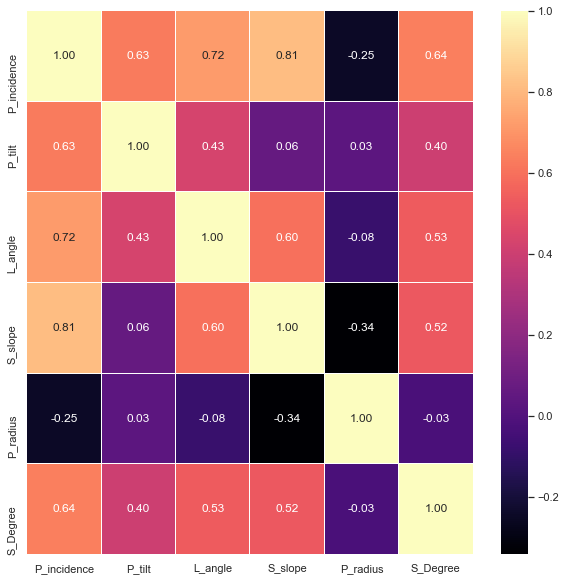

In [126]:
fig,ax = plt.subplots(figsize=(10, 10))   
sns.heatmap(df.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")
plt.show()

This heat map shows the strong and weak co-relations between the different variables and which variable strongly affects the other. The diagonal shows the relationship of a variable with itself, therefore it is 1. Posistive values show strong corelation and negative show weak corelation.

### Pairplot

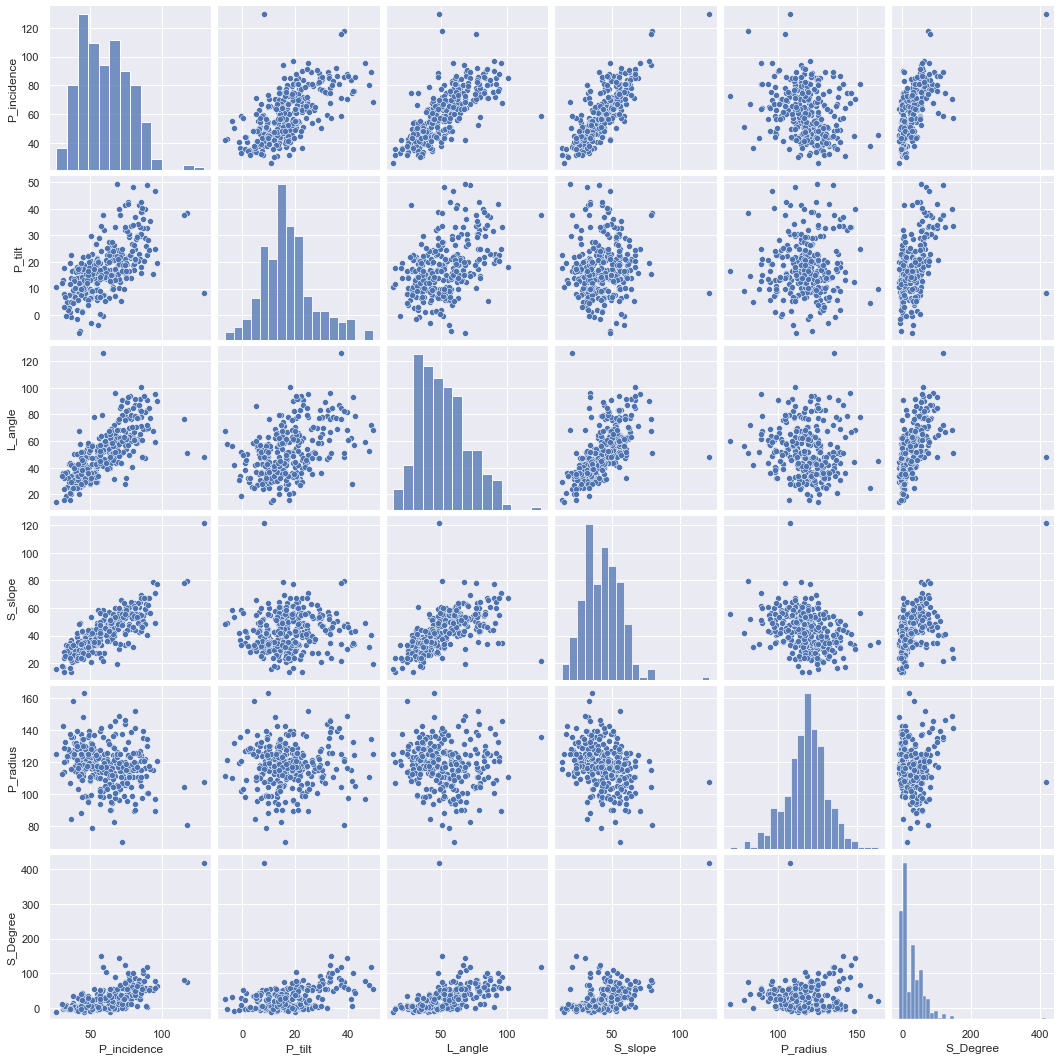

In [127]:
sns.pairplot(df)

This is a graphical representation of the co-relations between the variables. We can infer from here that P_incidence has a strong corelation with L_angle and S_slope as well as L_angle and S_slope are strongly related.

## Univariated Data analysis

### Count plot

<AxesSubplot:xlabel='Class', ylabel='count'>

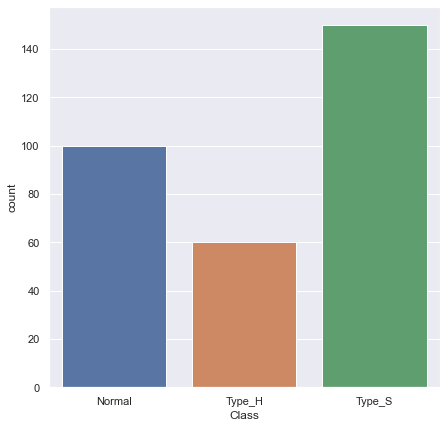

In [128]:
sns.countplot(df['Class'])

This is a graphical representation of the Value counts of different classes. Type_S is has the highest number, over 140 and Type_H has the lowest at 60.

### Box plot

IndexError: index 6 is out of bounds for axis 0 with size 6

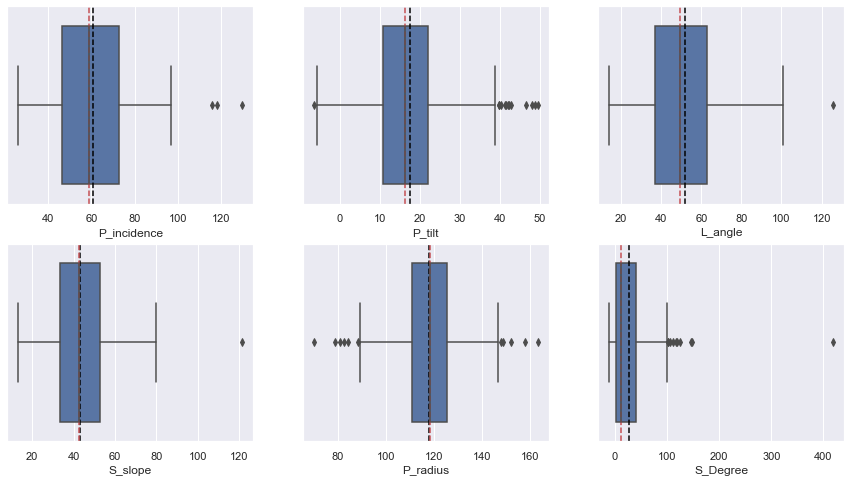

In [504]:
fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(15,8))
ax=ax.flatten()
j=0
for i in df:
    sns.boxplot(df[i], ax = ax[j])
    ax[j].axvline(df[i].mean(), ls='--',c='black')
    ax[j].axvline(df[i].median(), ls='--',c='r')
    j=j+1



This boxplot shows the 5 point summary for the different attributes. Some points here are - 

P_radius has outliers on the both sides.

S_Degree and S_slope have extreme outliers.

S_Degree is right skewed and outliers are toward the right.




### Histogram

array([[<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>]], dtype=object)

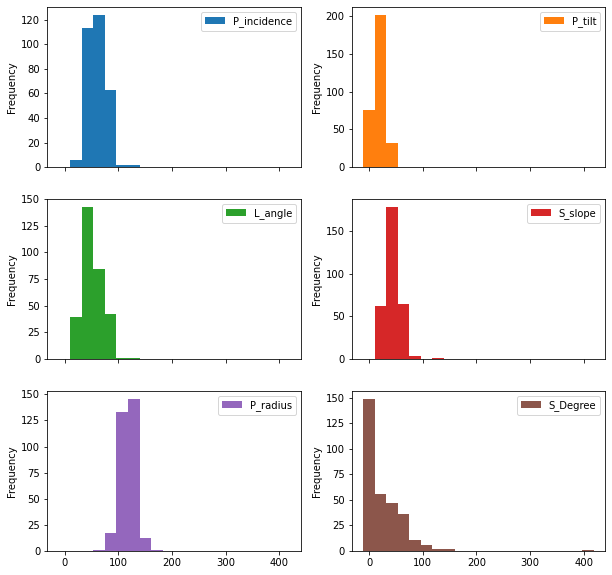

In [27]:
df.plot.hist(subplots=True, layout=(3,2), figsize=(10, 10), bins=20)

Frequency of different variables displayed as histograms. We can infer that most graphs reach the peak at about 50 and P_tilt reaches 200. Except S_Degree, rest other features can be assumed as normally distributed, as the mean and median are almost same.

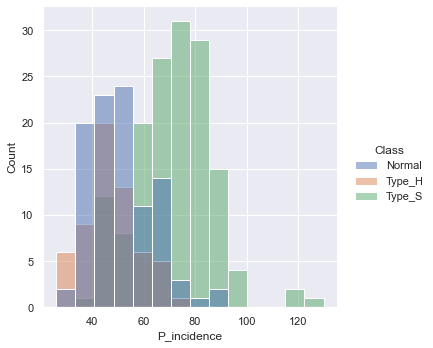

In [140]:
sns.displot(df, x="P_incidence", hue="Class")
sns.set(rc={"figure.figsize":(10, 10)}) 

A class wise distribution of P_incidence variable.

### Bivariated Analysis & Multivariated Analysis

<Figure size 1080x576 with 0 Axes>

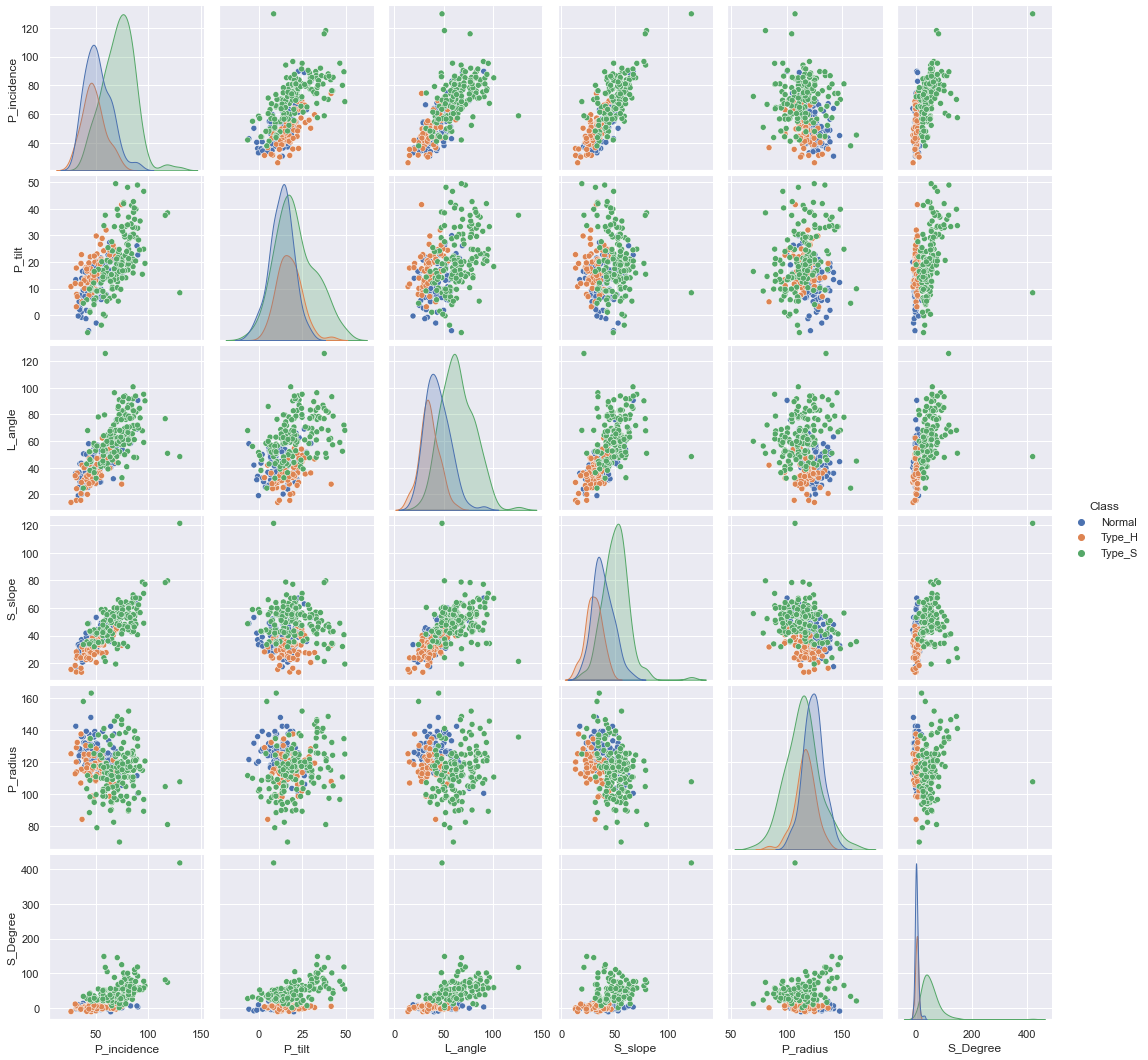

In [137]:
fig=plt.figure(figsize=(15,8))
sns.pairplot(df, hue='Class')

### Scatter plot

<AxesSubplot:title={'center':'Scatter Plot'}, xlabel='P_tilt', ylabel='L_angle'>

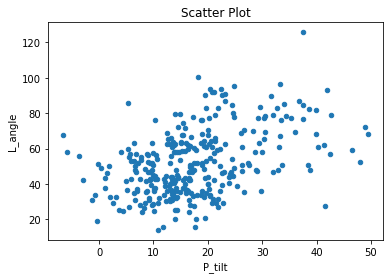

In [25]:
df.plot.scatter(x='P_tilt', y='L_angle', title='Scatter Plot')

A scatter plot between P_tilt and L_angle. There is density between 10 and 20.

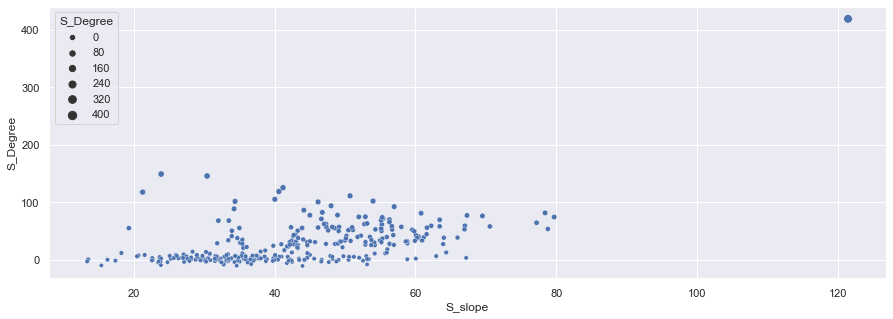

In [138]:
figure = plt.figure(figsize=(15,5))

ax = sns.scatterplot(x=df['S_slope'],y='S_Degree', data=df, size = "S_Degree")

A scatter plot between S_slope and S_degree. TWe can see the extreme outlier here.

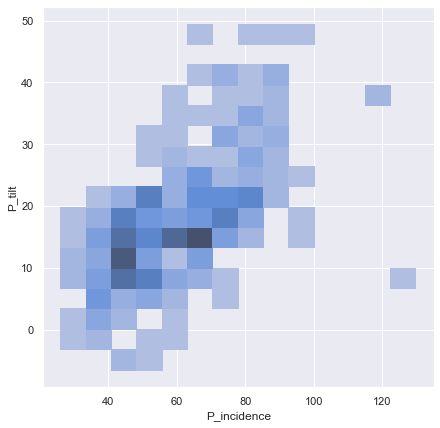

In [139]:
sns.set(style="darkgrid")

sns.histplot(data=df, x="P_incidence", y="P_tilt", kde= "True")
sns.set(rc={"figure.figsize":(50, 50)}) 
plt.show()

# <span style="font-family: Arial; font-weight:bold;font-size:1.1em;color:#0e92ea"> STEP - 4

## Data pre-processing

In [207]:
# Create a separate dataframe consisting only of the features i.e independent attributes

X=df.drop(['Class'], axis=1)
y=df['Class']

Segregate predictors vs target attributes therefore, drop the "Class" column.

### Train-test split

In [276]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=42)

Perform train-test split.

In [277]:
y_test.value_counts()

Type_S    42
Normal    32
Type_H    19
Name: Class, dtype: int64

In [278]:
y_train.value_counts()

Type_S    108
Normal     68
Type_H     41
Name: Class, dtype: int64

### Nomalization

In [279]:
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler

scale=StandardScaler()
X_train=scale.fit_transform(X_train)
X_test =scale.transform(X_test)

encode=LabelEncoder()
y_train=encode.fit_transform(y_train)
y_test=encode.transform(y_test)

Perform normalisation or scaling if required

# <span style="font-family: Arial; font-weight:bold;font-size:1.1em;color:#0e92ea"> STEP - 5

## Model training, testing and tuning

### Create KNN model

In [280]:
model = KNeighborsClassifier()
model.fit(X_train,y_train)

KNeighborsClassifier()

### Display the classification accuracies for train and test data

In [281]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Training data accuracy: {}".format(model.score(X_train,y_train)))

pred=model.predict(X_test)

print("Test data accuracy: {}".format(model.score(X_test,y_test)))

print("Accuracy score: {}".format(accuracy_score(y_test,pred)))

Training data accuracy: 0.8064516129032258
Test data accuracy: 0.8172043010752689
Accuracy score: 0.8172043010752689


### Display and explain the classification report

In [282]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.75      0.84      0.79        32
           1       0.73      0.58      0.65        19
           2       0.90      0.90      0.90        42

    accuracy                           0.82        93
   macro avg       0.80      0.78      0.78        93
weighted avg       0.82      0.82      0.81        93




from overall positives,

   #### 75% of Normal are predicted correctly 
   #### 73% of Type_H are predicted correctly 
   #### 90% of Type_S are predicted correctly 
    
    
For Recall,

####    84% of total values are predicted as Normal correctly.
   #### 58% of total values are predicted as Type_H
   #### 90% of total values are predicted as Type_S

To avoide False Negatives since as it is Medical prediction data therefore critical data , we will consider Recall than the precision. Type_H has high variance.

### Confusion matrix

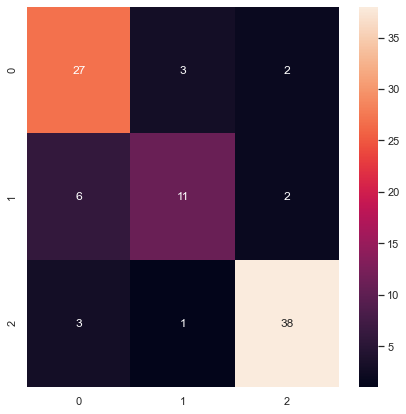

In [283]:
sns.heatmap(confusion_matrix(y_test,pred), annot=True)
sns.set(rc={"figure.figsize":(7, 7)})

### Automate the task of finding best values of K for KNN

In [287]:
scores =[]
for k in range(1,40):
    NNH = KNeighborsClassifier(n_neighbors = k)
    NNH.fit(X_train, y_train)
    scores.append(NNH.score(X_test, y_test))

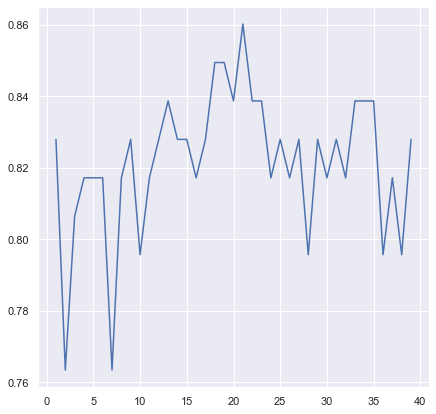

In [288]:
plt.plot(range(1,40),scores)

Therefore, a 86% accuracy can be achieved around k=20 and it drops down after that.

### Apply all the possible tuning techniques to train the best model for the given data

In [290]:
KNeighborsClassifier().get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

Get the parameteres for our model. This KNN model is using Minkowski distance and K=5.

In [292]:
acc_score=[]
n_value = pd.DataFrame(columns=['K_value','acc_score','MSE','weight','p'])
k_val=[]
w=[]
p_val=[]
weights=['uniform','distance']
p=[1,2]

for k in range(1,20):
    for j in weights:
        for i in p:
            model = KNeighborsClassifier(n_neighbors=k, weights=j, p=i)
            model.fit(X_train,y_train)
            pred=model.predict(X_test)
            acc_score.append(accuracy_score(y_test,pred))
            k_val.append(k)
            w.append(j)
            p_val.append(i)
n_value['K_value']=k_val
n_value['acc_score']=acc_score
n_value['MSE']=1-n_value['acc_score']  
n_value['weight']=w
n_value['p']=p_val

Provide different P value, n_neighbours & weights parameters to check for a better performing model with higher accuracy.

In [293]:
k_value=n_value[n_value['acc_score']==n_value['acc_score'].max()]
minimu_MSE=n_value[n_value['MSE']==n_value['MSE'].min()]

Maximize the accuracy score and minimize the distance.

In [294]:
print("Optimal K value for KNN")
print(k_value)

Optimal K value for KNN
    K_value  acc_score       MSE    weight  p
62       16   0.870968  0.129032  distance  1
70       18   0.870968  0.129032  distance  1


Optimal K value is giving the expected accuracy of around 86% with Manhattan distance.

###  Training with different syntax

In [506]:
NNH = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance' )

In [507]:
NNH.fit(X_train, y_train)

KNeighborsClassifier(weights='distance')

In [509]:
predicted_labels = NNH.predict(X_test)
NNH.score(X_test, y_test)

0.892904953145917

Here, choosing K=5 and weights as distance gives an even greater accuracy.

# <span style="font-family: Arial; font-weight:bold;font-size:1.1em;color:#0e92ea"> STEP - 6

#### Conclusion

K-Nearest Neighbour is one of the simplest Machine Learning algorithms based on Supervised Learning technique. It is used to solve both classification and regression problems. There is no need for additional assumptions as in Linear Regression.

But one disadvantage is that as the data gets scaled up, KNN becomes slower, therefore a better model should be used.

# <span style="font-family: Arial; font-weight:bold;font-size:1.4em;color:#0e92ea"> Part <span style="font-family: Times New Roman; font-weight:bold;font-size:1.1em;color:#0e92ea"> II

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea"> PROJECT CONTEXT

    
<font color=#000>
    
A bank X is on a massive digital transformation and has a growing customer base where
majority of them are liability customers vs borrowers. The bank is interested in expanding the
borrowers base rapidly to bring in more business via loan interests. A campaign that the bank showed an
average single digit conversion rate. Marketing
department wants to devise effective campaigns with better target marketing to increase the conversion ratio to double digit
with same budget as per last campaign.

&nbsp;

   <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea"> PROJECT OBJECTIVE
       
        
To build an AIML model using different Machine Learning techniques to perform focused marketing by predicting the potential customers who will
convert using the historical dataset.

&nbsp;

       
<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea"> DATA DESCRIPTION
    
The data consists of the different attributes of customer details such as : ID, age, average spend etc.
    


In [510]:
import os

from sklearn.preprocessing import LabelEncoder
from scipy import stats

sns.set_style('darkgrid')

from sklearn.preprocessing import MinMaxScaler
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn import model_selection

from collections import Counter
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score


# <span style="font-family: Arial; font-weight:bold;font-size:1.1em;color:#0e92ea"> STEP - 1

## Import and warehouse data

In [403]:
data1 = pd.read_csv('Part2 - Data1.csv')
data1

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level
0,1,25,1,49,91107,4,1.6,1
1,2,45,19,34,90089,3,1.5,1
2,3,39,15,11,94720,1,1.0,1
3,4,35,9,100,94112,1,2.7,2
4,5,35,8,45,91330,4,1.0,2
...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3
4996,4997,30,4,15,92037,4,0.4,1
4997,4998,63,39,24,93023,2,0.3,3
4998,4999,65,40,49,90034,3,0.5,2


In [404]:
data1.shape

(5000, 8)

In [405]:
data2 = pd.read_csv('Part2 -Data2.csv')
data2

,ID,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,0,1,0,0,0,NaN
1,2,0,1,0,0,0,NaN
2,3,0,0,0,0,0,NaN
3,4,0,0,0,0,0,NaN
4,5,0,0,0,0,1,NaN
...,...,...,...,...,...,...,...
4995,4996,0,0,0,1,0,0.0
4996,4997,85,0,0,1,0,0.0
4997,4998,0,0,0,0,0,0.0
4998,4999,0,0,0,1,0,0.0


In [406]:
data2.shape

(5000, 7)

### Therefore the size data is as follows :

 Part 1 has 5000 rows and 8 columns

 Part 2 has 5000 rows and 7 columns
 
 


## Merge all datasets

Since both the dataframes have the ID column in common, we merge them i.e. on that column and create a new dataframe. 

In [407]:
data=data1.merge(data2,left_on='ID',right_on='ID')

In [408]:
data

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,NaN
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,NaN
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,NaN
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,NaN
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,1,0,0.0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,1,0,0.0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0.0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,1,0,0.0


Therefore after successful merging of the datasets, the resulting dataset has 5000 rows i.e. the sum of all rows of the dataset and 14 columns as expected

# <span style="font-family: Arial; font-weight:bold;font-size:1.1em;color:#0e92ea"> STEP - 2

## Data cleansing

In [409]:
data.dtypes.value_counts()

int64      12
float64     2
dtype: int64

In [410]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Age                  5000 non-null   int64  
 2   CustomerSince        5000 non-null   int64  
 3   HighestSpend         5000 non-null   int64  
 4   ZipCode              5000 non-null   int64  
 5   HiddenScore          5000 non-null   int64  
 6   MonthlyAverageSpend  5000 non-null   float64
 7   Level                5000 non-null   int64  
 8   Mortgage             5000 non-null   int64  
 9   Security             5000 non-null   int64  
 10  FixedDepositAccount  5000 non-null   int64  
 11  InternetBanking      5000 non-null   int64  
 12  CreditCard           5000 non-null   int64  
 13  LoanOnCard           4980 non-null   float64
dtypes: float64(2), int64(12)
memory usage: 585.9 KB


The dataset has 12 columns of int datatype and 2 of float

In [411]:
data = data.drop(columns=['ID'])

In [412]:
col=['HiddenScore','Level','Security','FixedDepositAccount', 'InternetBanking', 'CreditCard', 'LoanOnCard']
for i in col:
    data[i]=data[i].astype('category')

In [413]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Age                  5000 non-null   int64   
 1   CustomerSince        5000 non-null   int64   
 2   HighestSpend         5000 non-null   int64   
 3   ZipCode              5000 non-null   int64   
 4   HiddenScore          5000 non-null   category
 5   MonthlyAverageSpend  5000 non-null   float64 
 6   Level                5000 non-null   category
 7   Mortgage             5000 non-null   int64   
 8   Security             5000 non-null   category
 9   FixedDepositAccount  5000 non-null   category
 10  InternetBanking      5000 non-null   category
 11  CreditCard           5000 non-null   category
 12  LoanOnCard           4980 non-null   category
dtypes: category(7), float64(1), int64(5)
memory usage: 308.4 KB


Changing the data type of the appropriate variables to category

### Explore for null values

In [414]:
dupes = df.duplicated()
sum(dupes)

0

In [415]:
data.isnull().values.any()  

True

In [416]:
data.isnull().sum().sum()

20

Therefore there are no duplicates and 20 null values in the dataset

In [417]:
pd.DataFrame({'value' : data['LoanOnCard'], 'Missing?' : data['LoanOnCard'].isnull()})

,value,Missing?
0,NaN,True
1,NaN,True
2,NaN,True
3,NaN,True
4,NaN,True
...,...,...
4995,0.0,False
4996,0.0,False
4997,0.0,False
4998,0.0,False


As we can see, the column LoanOnCard has 20 missing values

In [418]:
data['LoanOnCard'].describe()

count     4980.0
unique       2.0
top          0.0
freq      4500.0
Name: LoanOnCard, dtype: float64

In [499]:
data.dropna(axis=0,inplace=True)

Drop the missing values.

In [500]:
data.isnull().sum()

Age                    0
CustomerSince          0
HighestSpend           0
ZipCode                0
HiddenScore            0
MonthlyAverageSpend    0
Level                  0
Mortgage               0
Security               0
FixedDepositAccount    0
InternetBanking        0
CreditCard             0
LoanOnCard             0
dtype: int64

The data is free of missing values now

In [501]:
data

,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
9,34,9,180,93023,1,8.9,3,0,0,0,0,0,1.0
10,65,39,105,94710,4,2.4,3,0,0,0,0,0,0.0
11,29,5,45,90277,3,0.1,2,0,0,0,1,0,0.0
12,48,23,114,93106,2,3.8,3,0,1,0,0,0,0.0
13,59,32,40,94920,4,2.5,2,0,0,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,92697,1,1.9,3,0,0,0,1,0,0.0
4996,30,4,15,92037,4,0.4,1,85,0,0,1,0,0.0
4997,63,39,24,93023,2,0.3,3,0,0,0,0,0,0.0
4998,65,40,49,90034,3,0.5,2,0,0,0,1,0,0.0


Cleaned dataset suitable for analysis.

# <span style="font-family: Arial; font-weight:bold;font-size:1.1em;color:#0e92ea"> STEP - 3

### Data analysis & visualisation

### Statistical Analysis

In [363]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,4980.0,45.352610,11.464212,23.0,35.0,45.0,55.000,67.0
CustomerSince,4980.0,20.117671,11.468716,-3.0,10.0,20.0,30.000,43.0
HighestSpend,4980.0,73.852410,46.070090,8.0,39.0,64.0,98.000,224.0
ZipCode,4980.0,93152.420482,2123.660073,9307.0,91911.0,93407.0,94608.000,96651.0
MonthlyAverageSpend,4980.0,1.939536,1.750006,0.0,0.7,1.5,2.525,10.0
Mortgage,4980.0,56.589759,101.836758,0.0,0.0,0.0,101.000,635.0


In [364]:
mean=data['Age'].mean()
median=data['Age'].median()
mode=data['Age'].mode()

print('Mean: ',mean,'\nMedian: ',median,'\nMode: ',mode)



Mean:  45.35261044176707 
Median:  45.0 
Mode:  0    43
dtype: int64



Age has no skewness as Mean and Median are nearly equal

highestspend and monthly average spend have Mean greater than Median therefore there is positive skewness

Mortage is affected by outliers as it has 50% zero values and maximum value is 635. 


### Corelation

In [365]:
data.corr() 

,Age,CustomerSince,HighestSpend,ZipCode,MonthlyAverageSpend,Mortgage
Age,1.000000,0.994208,-0.054951,-0.029939,-0.051896,-0.013272
CustomerSince,0.994208,1.000000,-0.046092,-0.029415,-0.049918,-0.011380
HighestSpend,-0.054951,-0.046092,1.000000,-0.016447,0.646109,0.207236
ZipCode,-0.029939,-0.029415,-0.016447,1.000000,-0.004339,0.007214
MonthlyAverageSpend,-0.051896,-0.049918,0.646109,-0.004339,1.000000,0.110275
Mortgage,-0.013272,-0.011380,0.207236,0.007214,0.110275,1.000000


### Heat map

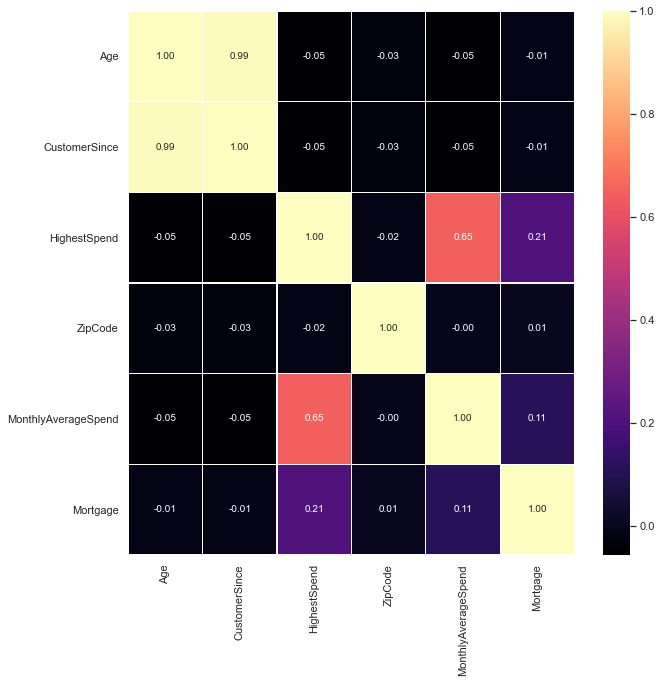

In [366]:
fig,ax = plt.subplots(figsize=(10, 10))   
sns.heatmap(data.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")
plt.show()

This heat map shows the strong and weak co-relations between the different variables and which variable strongly affects the other.

### Univariate Analysis

#### Age

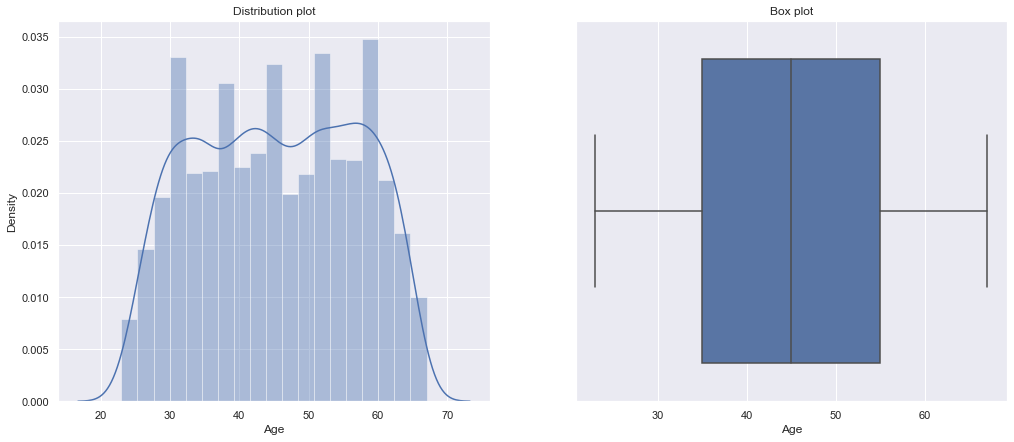

In [424]:
f, axes = plt.subplots(1, 2, figsize=(17,7))
sns.boxplot(x = 'Age', data=data,  orient='h' , ax=axes[1])
sns.distplot(data['Age'],  ax=axes[0])
axes[0].set_title('Distribution plot')
axes[1].set_title('Box plot')
plt.show()


No outliers in Age. Maximum density is between 30 and 60

#### HighestSpend

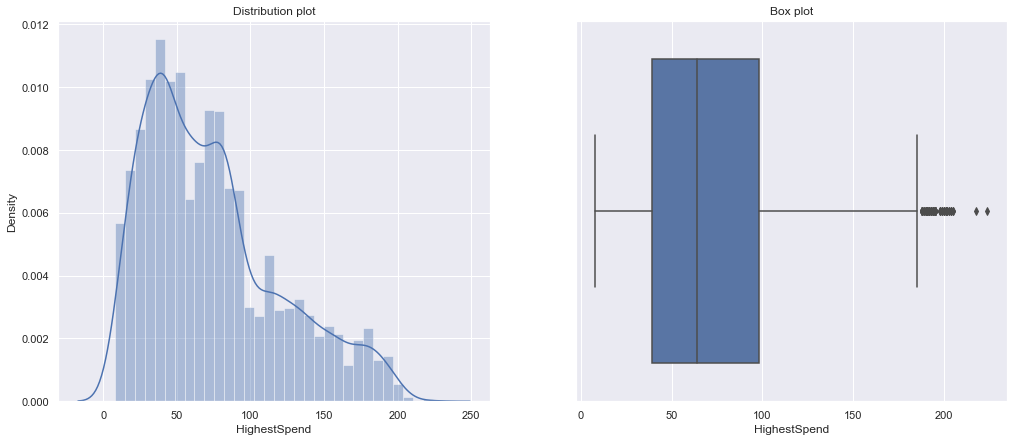

In [426]:
f, axes = plt.subplots(1, 2, figsize=(17,7))
sns.boxplot(x = 'HighestSpend', data=data,  orient='h' , ax=axes[1])
sns.distplot(data['HighestSpend'],  ax=axes[0])
axes[0].set_title('Distribution plot')
axes[1].set_title('Box plot')
plt.show()


There are outliers in HighestSpend. Maximum value is around 40-50. It is right skewed.

#### MonthlyAverageSpend

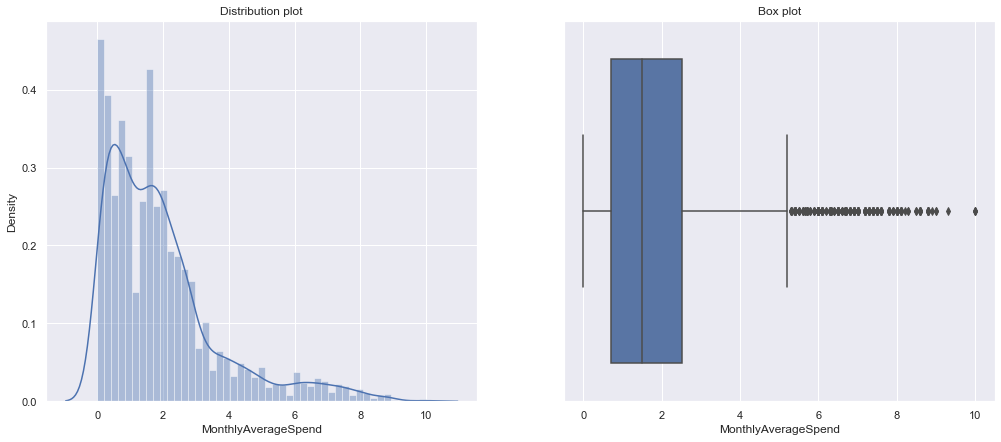

In [427]:
f, axes = plt.subplots(1, 2, figsize=(17,7))
sns.boxplot(x = 'MonthlyAverageSpend', data=data,  orient='h' , ax=axes[1])
sns.distplot(data['MonthlyAverageSpend'],  ax=axes[0])
axes[0].set_title('Distribution plot')
axes[1].set_title('Box plot')
plt.show()


This is also right skewed. There are a lot of outliers.

#### Mortgage

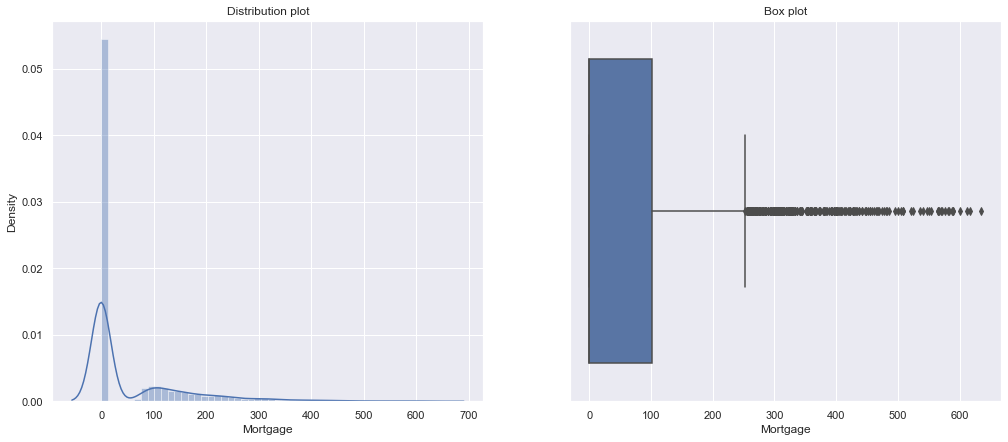

In [428]:
f, axes = plt.subplots(1, 2, figsize=(17,7))
sns.boxplot(x = 'Mortgage', data=data,  orient='h' , ax=axes[1])
sns.distplot(data['Mortgage'],  ax=axes[0])
axes[0].set_title('Distribution plot')
axes[1].set_title('Box plot')
plt.show()

Most values are zero and there are many outliers.

### Categorical variables

#### HiddenScore

<AxesSubplot:xlabel='HiddenScore', ylabel='count'>

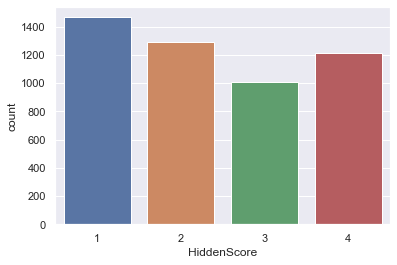

In [445]:
sns.countplot(data['HiddenScore'])

A count plot of HiddenScore. It has nearly equal distribution of each category.

#### Level

<AxesSubplot:xlabel='Level', ylabel='count'>

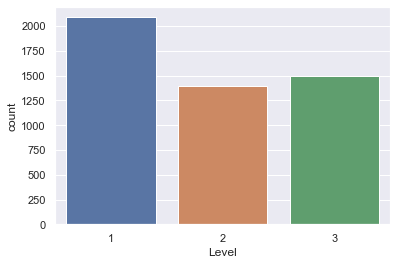

In [446]:
sns.countplot(data['Level'])

Level 1 has more customers and 2 and 3 are nearly equal

#### FixedDepositAccount

<AxesSubplot:xlabel='FixedDepositAccount', ylabel='count'>

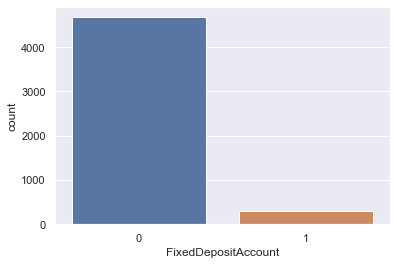

In [447]:
sns.countplot(data['FixedDepositAccount'])

Almost all of the customers do not have Fixed deposit

#### InternetBanking


<AxesSubplot:xlabel='InternetBanking', ylabel='count'>

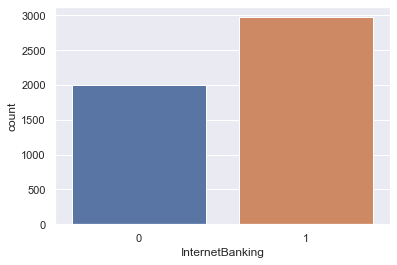

In [448]:
sns.countplot(data['InternetBanking'])

Almost 25% more customers have Internet banking as compared to those who don't.

#### CreditCard


<AxesSubplot:xlabel='CreditCard', ylabel='count'>

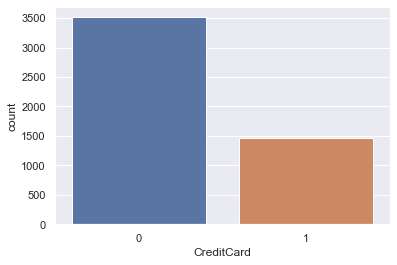

In [450]:
sns.countplot(data['CreditCard'])

Almost more than half customers do not have Credit card as compared to those who do.

#### LoanOnCard


<AxesSubplot:xlabel='LoanOnCard', ylabel='count'>

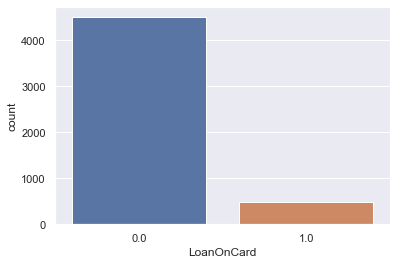

In [451]:
sns.countplot(data['LoanOnCard'])

We can see the great difference in Loan.

### Bi Variate & Multivariated Analysis

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


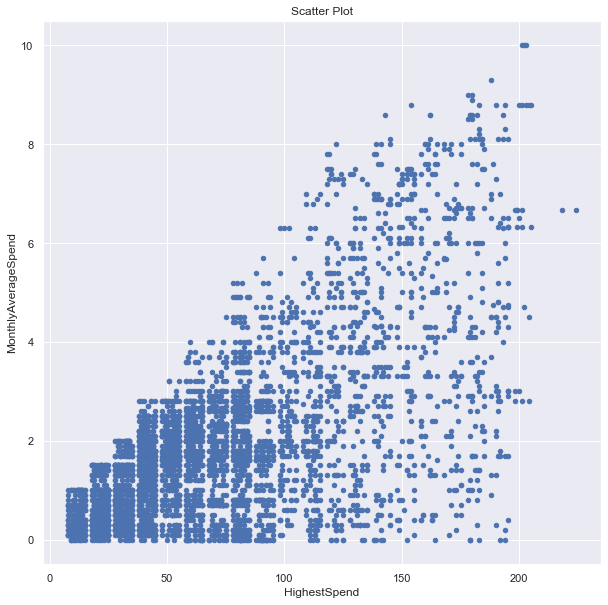

In [476]:
data.plot.scatter(x='HighestSpend', y='MonthlyAverageSpend', title='Scatter Plot')
sns.set(rc={"figure.figsize":(5,5)}) 

A sctter plot showing a strong positive relation between HighestSpend and MonthlyAverageSpend. Most customers spend between 0 and 100

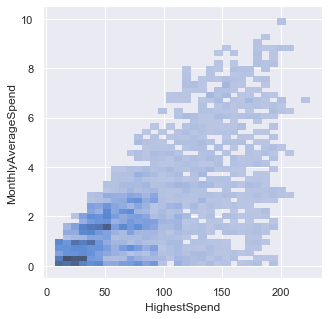

In [479]:
sns.set(style="darkgrid")

sns.histplot(data=data, x="HighestSpend", y="MonthlyAverageSpend", kde= "True")
sns.set(rc={"figure.figsize":(50, 50)}) 
plt.show()

A different visualization of the above.

#### LoanOnCard vs CustomerSince

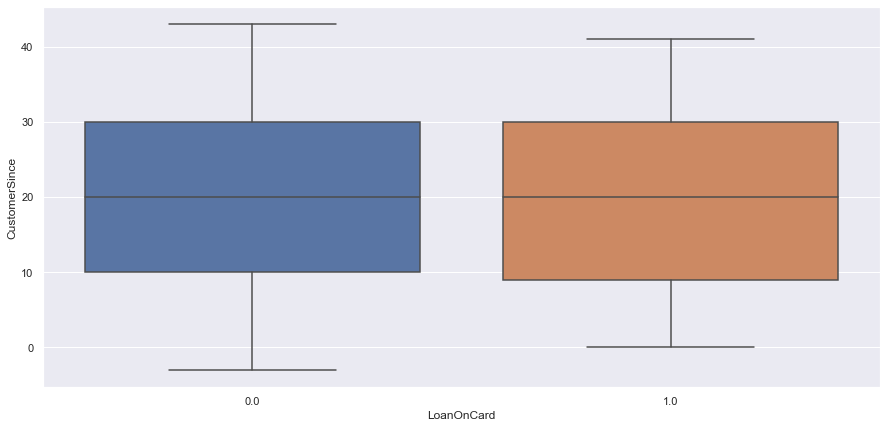

In [453]:
plt.figure(figsize=(15,7))
sns.boxplot(x='LoanOnCard', y='CustomerSince', data= data)
plt.show()

There is equal distribution on loan holders and non-loan holders.

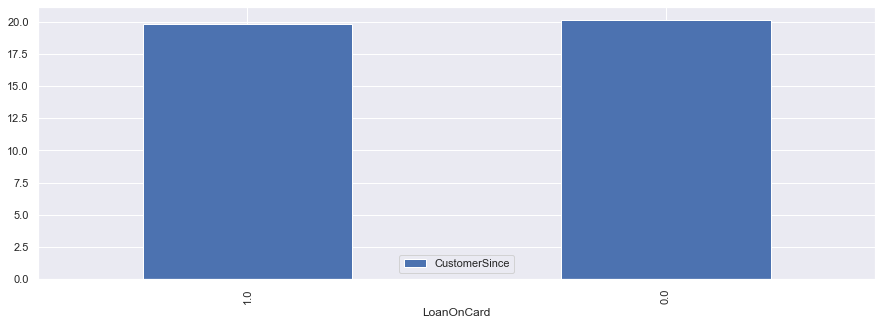

In [454]:
data.groupby(by=['LoanOnCard'])['CustomerSince'].mean().reset_index().sort_values(['CustomerSince']).tail(10).plot(x='LoanOnCard',
                                                                                                           y='CustomerSince',
                                                                                                           kind='bar',
                                                                                                           figsize=(15,5))
plt.show()

Both loan holders and non loan holders have almost same Mean.

#### Age vs LoanOnCard

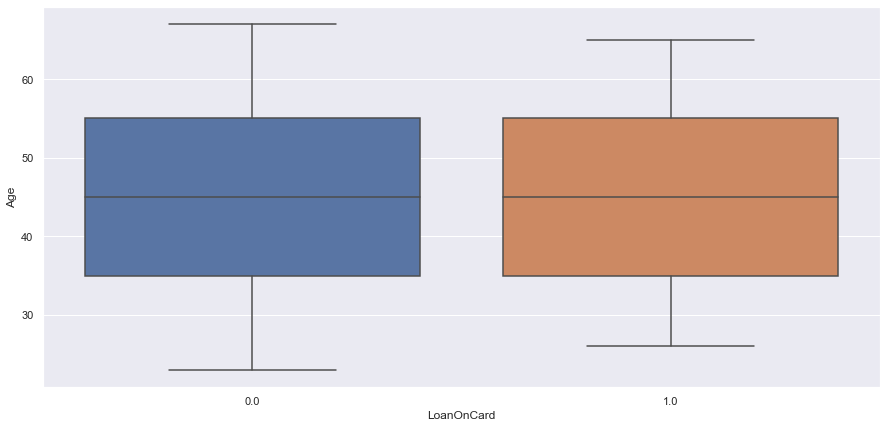

In [455]:
plt.figure(figsize=(15,7))
sns.boxplot(x='LoanOnCard', y='Age', data= data)
plt.show()

Age is almost equal for loan holders and non-loan holders

### Category vs Category

#### Hidden Score vs Loan on card

<AxesSubplot:xlabel='HiddenScore', ylabel='count'>

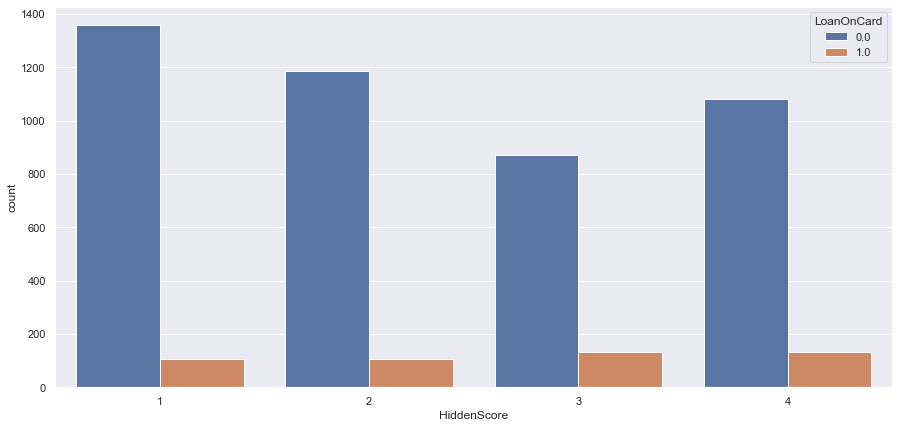

In [482]:
plt.figure(figsize=(15,7))
sns.countplot(data['HiddenScore'],hue=data['LoanOnCard'])

Hidden score is more for non-loan holders

#### Level vs Loan on card

<AxesSubplot:xlabel='Level', ylabel='count'>

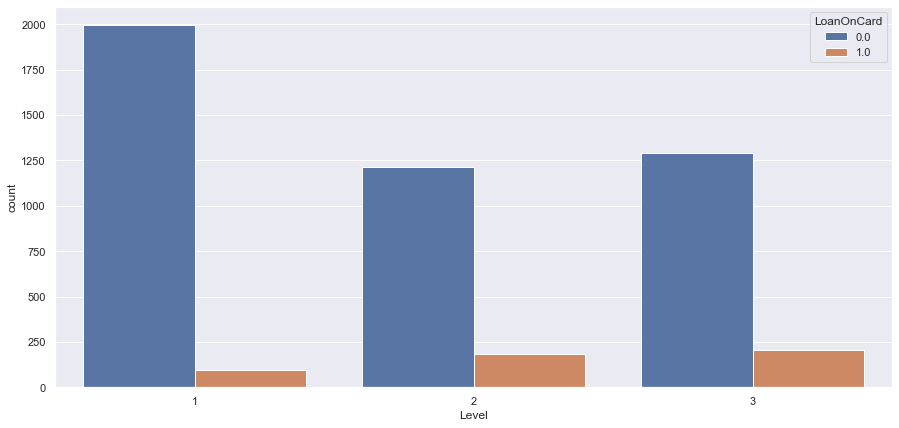

In [485]:
plt.figure(figsize=(15,7))
sns.countplot(data['Level'],hue=data['LoanOnCard'])


Level 1 has minimum number of loan holders

Loan holders in Level 2 and 3 are nearly equal



#### Security vs Loan on card

<AxesSubplot:xlabel='Security', ylabel='count'>

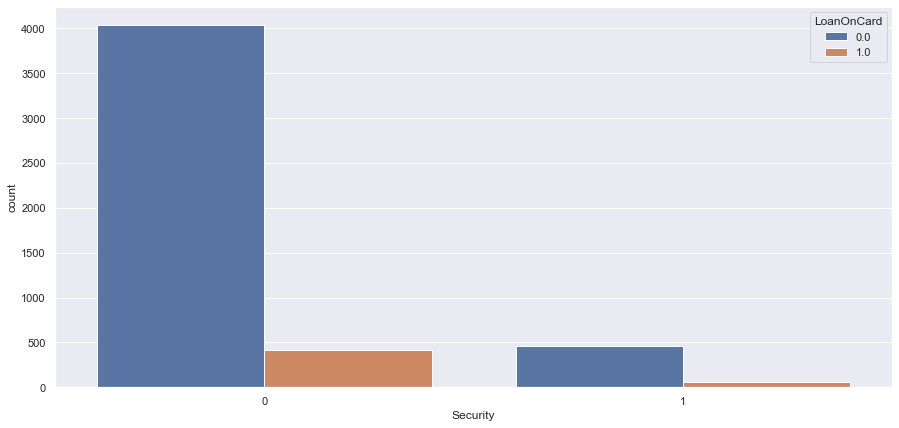

In [486]:
plt.figure(figsize=(15,7))
sns.countplot(data['Security'],hue=data['LoanOnCard'])

Customers who have loan do not have much security




# <span style="font-family: Arial; font-weight:bold;font-size:1.1em;color:#0e92ea"> STEP - 4

In [488]:
X=data.drop(columns='LoanOnCard')
y=data['LoanOnCard'] 

In [490]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# <span style="font-family: Arial; font-weight:bold;font-size:1.1em;color:#0e92ea"> STEP - 5

### Logistic Regression Model

In [491]:
logit = LogisticRegression()
logit.fit(X_train, y_train)
logit_pred = logit.predict(X_test)

print('Accuracy on Training data:',logit.score(X_train, y_train) )
print('Accuracy on Test data:',logit.score(X_test, y_test) )

Accuracy on Training data: 0.9099254159495124
Accuracy on Test data: 0.8995983935742972


There is an effect on accuracy probably due to outliers

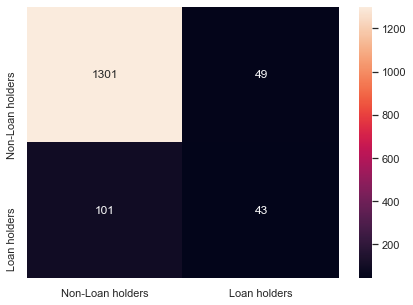

In [492]:
cm = confusion_matrix(y_test, logit_pred, labels=[0, 1])

data_cm = pd.DataFrame(cm, index = [i for i in ["Non-Loan holders","Loan holders"]],
                  columns = [i for i in ["Non-Loan holders","Loan holders"]])
plt.figure(figsize = (7,5))
sns.heatmap(data_cm, annot=True ,fmt='g')
plt.show()

In [493]:
print("classification  Matrix:\n",classification_report(y_test,logit_pred))

classification  Matrix:
               precision    recall  f1-score   support

         0.0       0.93      0.96      0.95      1350
         1.0       0.47      0.30      0.36       144

    accuracy                           0.90      1494
   macro avg       0.70      0.63      0.65      1494
weighted avg       0.88      0.90      0.89      1494



from overall positives,

   #### 93% of Class 0 are predicted correctly 
   #### 47% of Class 1 are predicted correctly 
  
    
The model is less accurate in predicting class 1 as compared to class 0

#### Naive Bayes Model

In [496]:
g_model = GaussianNB()
g_model.fit(X_train, y_train)
g_pred = g_model.predict(X_test)

print('Accuracy on Training data:',g_model.score(X_train, y_train) )
print('Accuracy on Test data:',g_model.score(X_test, y_test) )

Accuracy on Training data: 0.8924268502581756
Accuracy on Test data: 0.8741633199464525


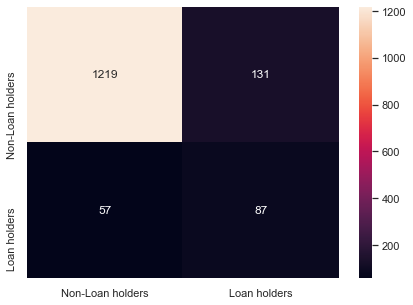

In [497]:
cm = confusion_matrix(y_test, g_pred, labels=[0, 1])

data_cm = pd.DataFrame(cm, index = [i for i in ["Non-Loan holders","Loan holders"]],
                  columns = [i for i in ["Non-Loan holders","Loan holders"]])
plt.figure(figsize = (7,5))
sns.heatmap(data_cm, annot=True ,fmt='g')
plt.show()

In [498]:
print("classification  Matrix:\n",classification_report(y_test,g_pred))

classification  Matrix:
               precision    recall  f1-score   support

         0.0       0.96      0.90      0.93      1350
         1.0       0.40      0.60      0.48       144

    accuracy                           0.87      1494
   macro avg       0.68      0.75      0.70      1494
weighted avg       0.90      0.87      0.89      1494



from overall positives,

   #### 96% of Class 0 are predicted correctly 
   #### 40% of Class 1 are predicted correctly 
  
    
The model is less accurate in predicting class 1 as compared to class 0. Here class 0 has even less accuracy

# <span style="font-family: Arial; font-weight:bold;font-size:1.1em;color:#0e92ea"> STEP - 6

### Suggestions or improvements

The accuracy of the model is affected by the extreme outliers. Therefore a neccesary improvement would be to replace the outliers by mean or median values and train the model again.

# <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#0e92ea"> SUBMITTED BY - <span style="font-family: Arial; font-weight:bold;font-size:1em;color:#000"> UTKARSH R. WILSON